Accuracy: 0.85
Confusion Matrix:
[[65  6]
 [ 9 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        71
           1       0.77      0.69      0.73        29

    accuracy                           0.85       100
   macro avg       0.82      0.80      0.81       100
weighted avg       0.85      0.85      0.85       100



C:\Users\hriti\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


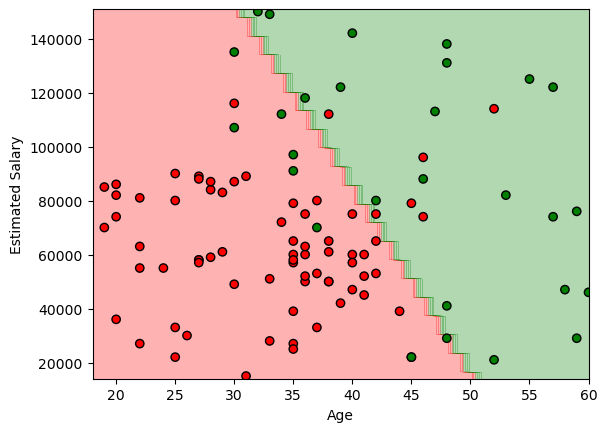

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load and preprocess the data
data = pd.read_csv("User_Data.csv")
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data = data.drop('User ID', axis=1)

# Feature and target selection
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

# Decision boundary visualization
def plot_decision_boundary(X, y, model):
    X1, X2 = X.iloc[:, 0], X.iloc[:, 1]
    X1_grid, X2_grid = np.meshgrid(np.arange(X1.min() - 1, X1.max() + 1, 1),
                                   np.arange(X2.min() - 1000, X2.max() + 1000, 100))
    Z = model.predict(np.array([X1_grid.ravel(), X2_grid.ravel()]).T).reshape(X1_grid.shape)
    plt.contourf(X1_grid, X2_grid, Z, alpha=0.3, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X1, X2, c=y, cmap=ListedColormap(('red', 'green')), edgecolors='k')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.show()

plot_decision_boundary(X_test, y_test, model)
